In [21]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [22]:
# Load the final_pairs from the CSV file
pair_df = pd.read_csv('filtered_pairs.csv')

# Verify the imported final_pairs
pair_df

,Pair 1,Pair 2
0,MDLZ,PEP
1,ESS,UDR
2,LNT,XEL
3,AEP,CMS
4,DUK,XEL
5,BAC,PNC
6,RSG,WM
7,ED,LNT
8,MCHP,NXPI
9,COF,FITB


In [23]:
# Load your stock data
file_path = 'SPY_cleaned_data.csv'
data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Initialize the all_stock_data dictionary
all_stock_data = {}

# Assuming pair_df is already defined and contains 'Pair 1' and 'Pair 2'
for index, row in pair_df.iterrows():
    pair = [row['Pair 1'], row['Pair 2']]
    
    # Filter the data for the given pair
    if pair[0] in data.columns and pair[1] in data.columns:
        pair_data = data[[pair[0], pair[1]]]
        all_stock_data[tuple(pair)] = pair_data

all_stock_data

{('MDLZ',
  'PEP'):              MDLZ     PEP
 date                     
 2012-06-01  37.57   67.51
 2012-06-04  37.65   67.48
 2012-06-05  37.60   67.00
 2012-06-06  37.98   67.49
 2012-06-07  38.15   67.68
 ...           ...     ...
 2024-06-03  67.35  171.23
 2024-06-04  68.09  173.89
 2024-06-05  67.98  173.49
 2024-06-06  68.19  173.20
 2024-06-07  67.81  171.04
 
 [3024 rows x 2 columns],
 ('ESS',
  'UDR'):                ESS    UDR
 date                     
 2012-06-01  147.96  25.35
 2012-06-04  146.97  25.22
 2012-06-05  150.60  25.71
 2012-06-06  153.48  26.12
 2012-06-07  151.43  25.72
 ...            ...    ...
 2024-06-03  260.63  38.86
 2024-06-04  263.81  39.59
 2024-06-05  268.08  39.76
 2024-06-06  268.32  39.60
 2024-06-07  268.07  39.67
 
 [3024 rows x 2 columns],
 ('LNT',
  'XEL'):                LNT    XEL
 date                     
 2012-06-01  21.705  27.96
 2012-06-04  21.735  28.12
 2012-06-05  21.940  28.28
 2012-06-06  22.220  28.54
 2012-06-07  22.345  28.4

/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


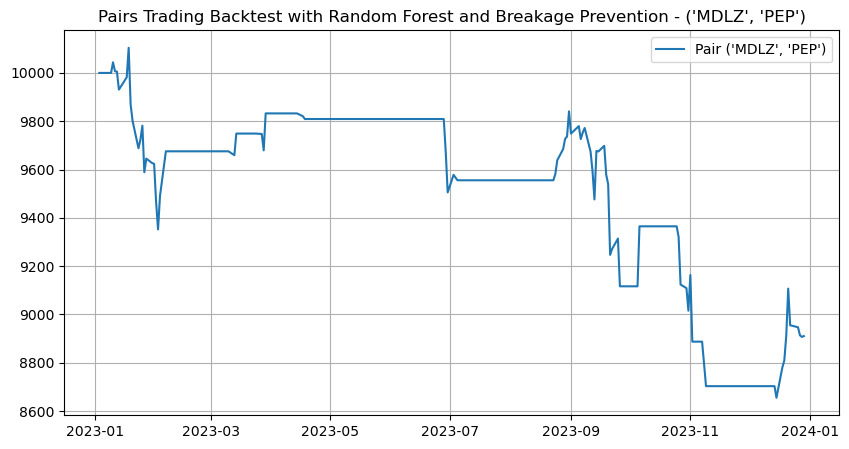

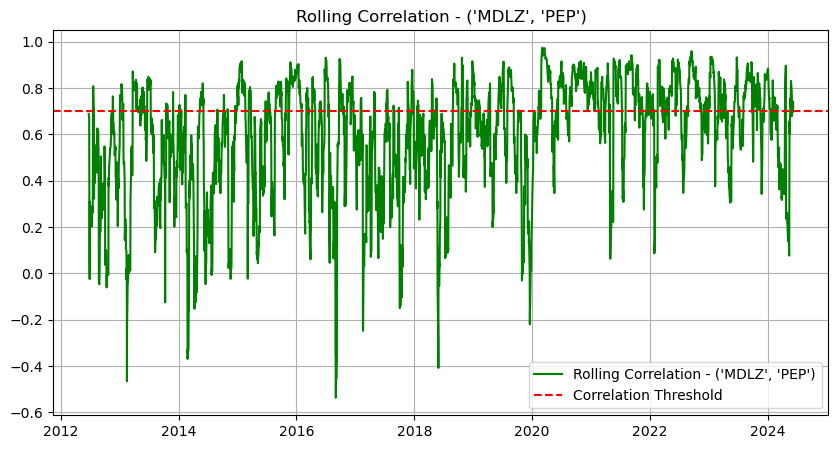

Performance for pair ('MDLZ', 'PEP'):
Cumulative Return: -10.98%
Sharpe Ratio: -1.11
Sortino Ratio: -0.09
Max Drawdown: -14.34%
Calmar Ratio: -0.77
Test R²: -0.08
Number of Trades: 352


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


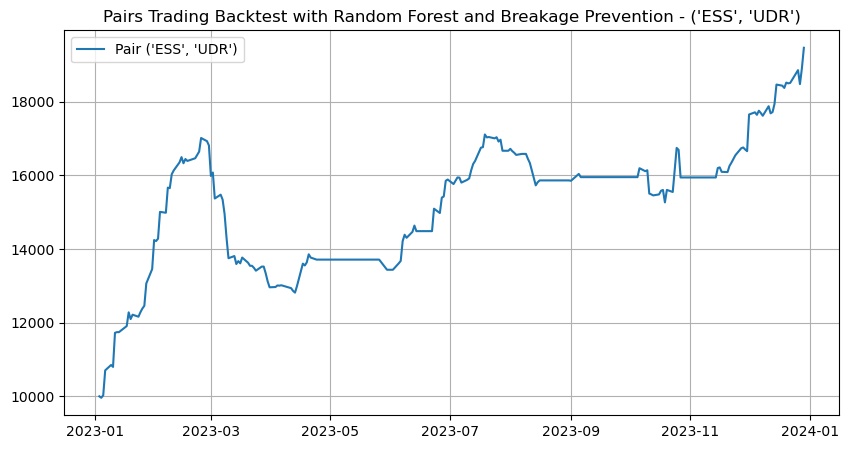

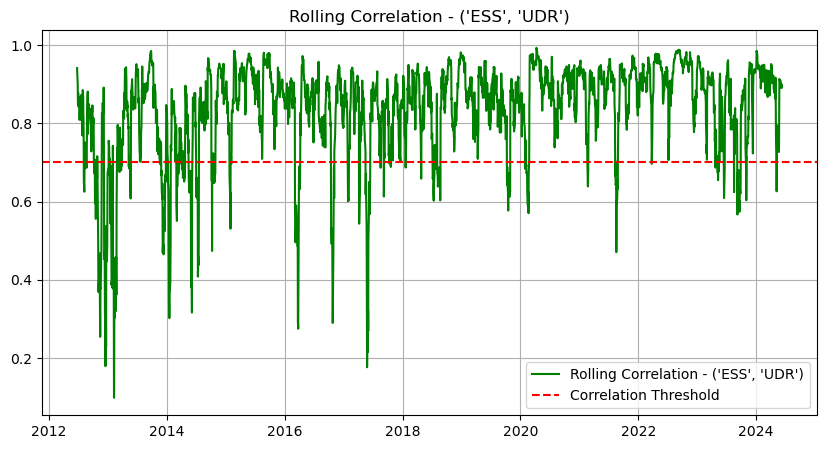

Performance for pair ('ESS', 'UDR'):
Cumulative Return: 95.65%
Sharpe Ratio: 2.78
Sortino Ratio: 0.33
Max Drawdown: -24.67%
Calmar Ratio: 3.88
Test R²: -0.08
Number of Trades: 339


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


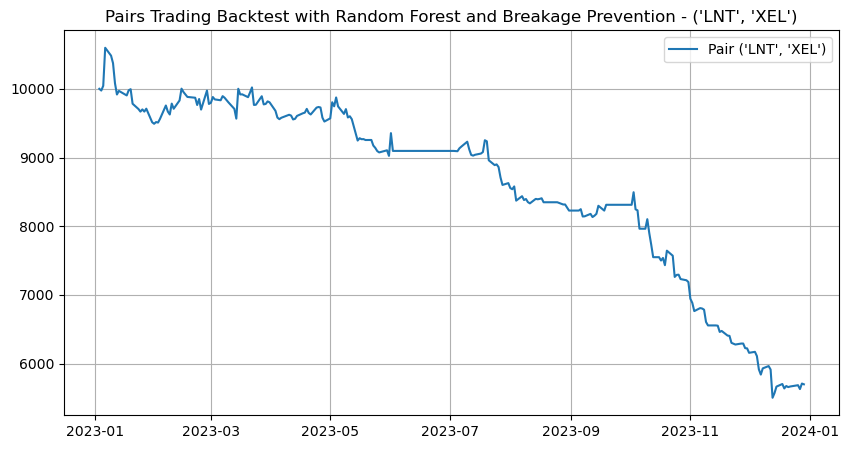

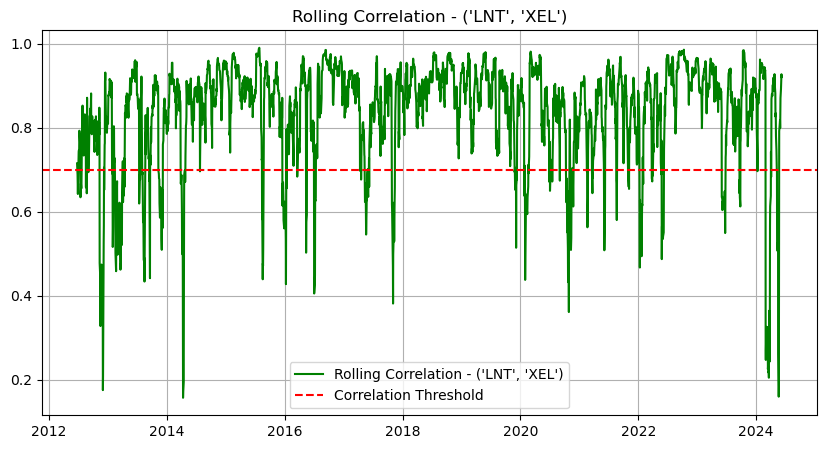

Performance for pair ('LNT', 'XEL'):
Cumulative Return: -43.26%
Sharpe Ratio: -2.78
Sortino Ratio: -0.21
Max Drawdown: -48.07%
Calmar Ratio: -0.90
Test R²: -0.08
Number of Trades: 347


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


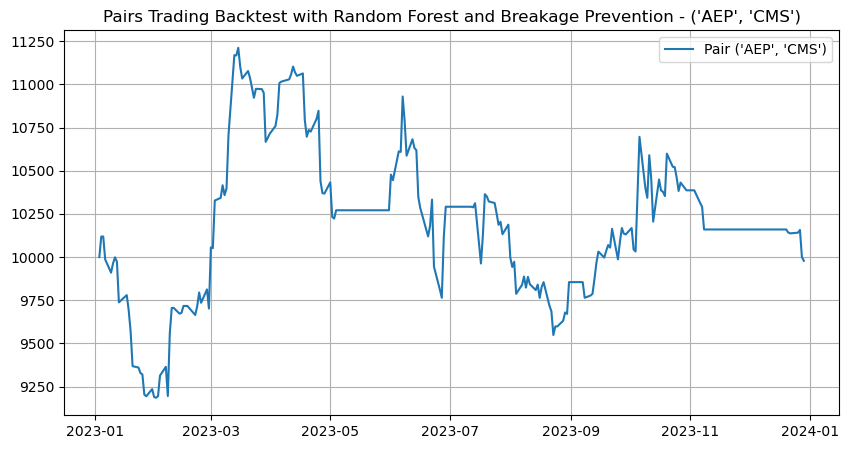

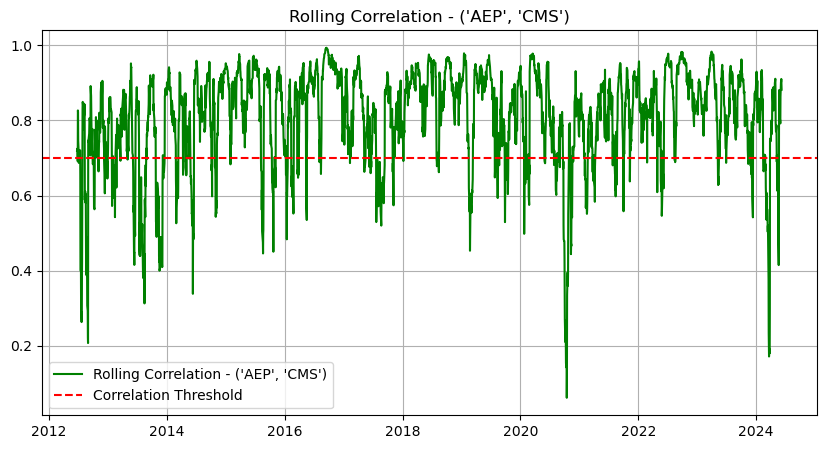

Performance for pair ('AEP', 'CMS'):
Cumulative Return: -0.22%
Sharpe Ratio: 0.08
Sortino Ratio: 0.01
Max Drawdown: -14.83%
Calmar Ratio: -0.01
Test R²: -0.07
Number of Trades: 342


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


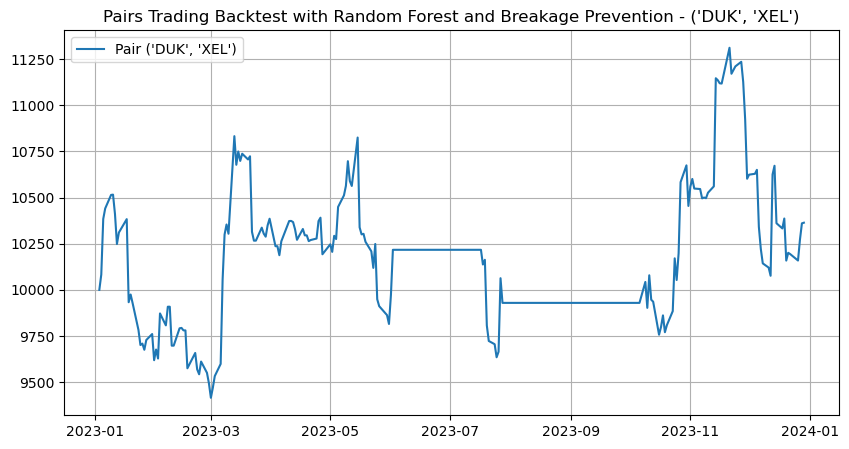

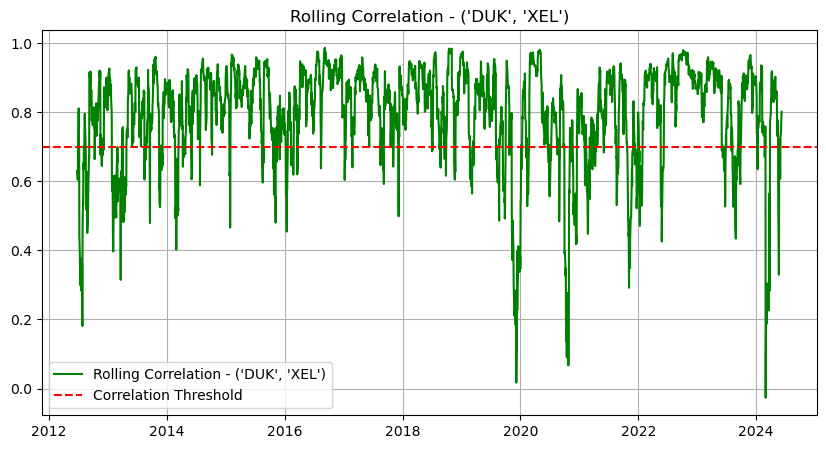

Performance for pair ('DUK', 'XEL'):
Cumulative Return: 3.67%
Sharpe Ratio: 0.28
Sortino Ratio: 0.03
Max Drawdown: -11.06%
Calmar Ratio: 0.33
Test R²: -0.04
Number of Trades: 348


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


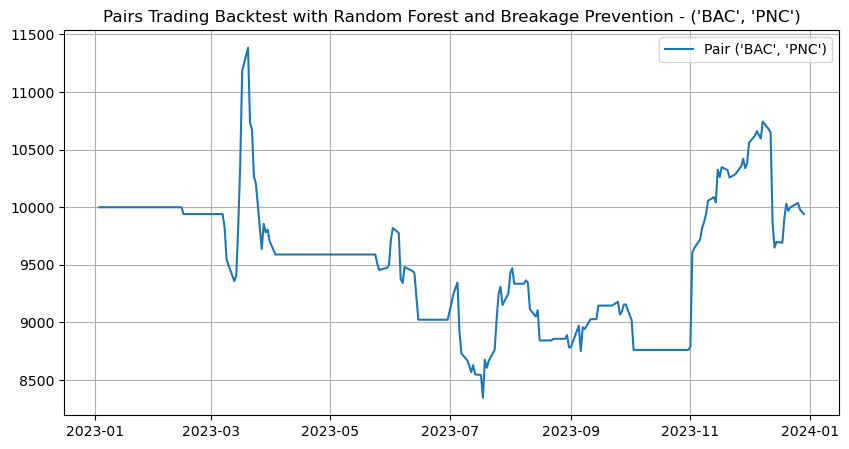

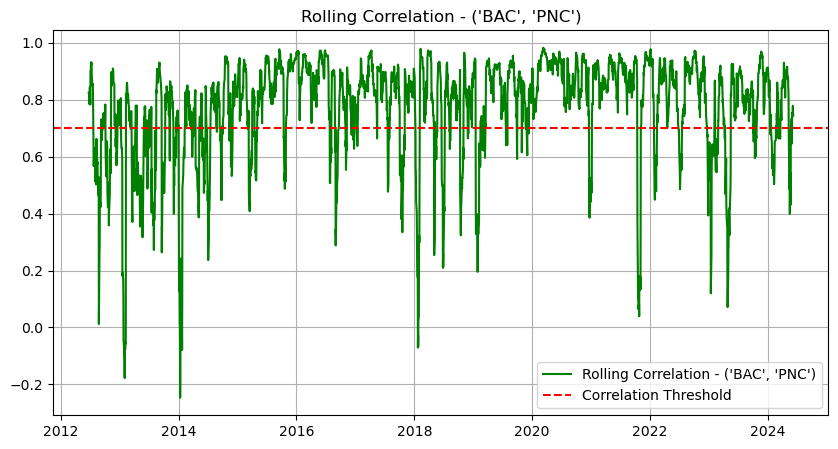

Performance for pair ('BAC', 'PNC'):
Cumulative Return: -0.61%
Sharpe Ratio: 0.09
Sortino Ratio: 0.01
Max Drawdown: -26.69%
Calmar Ratio: -0.02
Test R²: -0.08
Number of Trades: 352


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


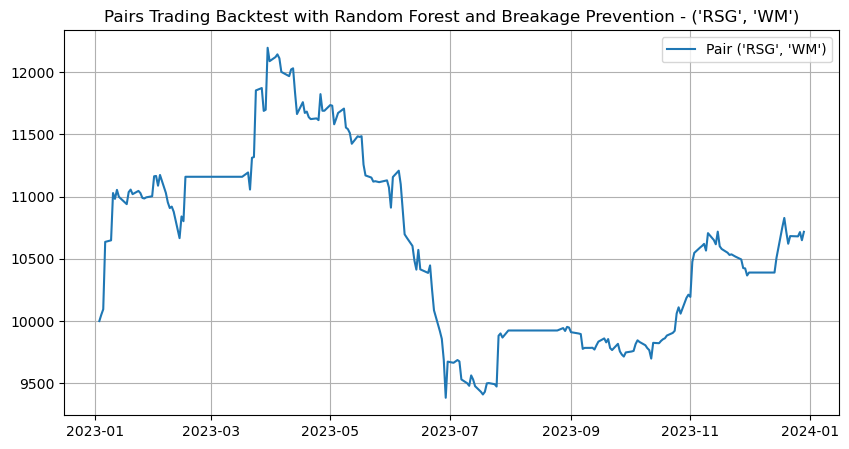

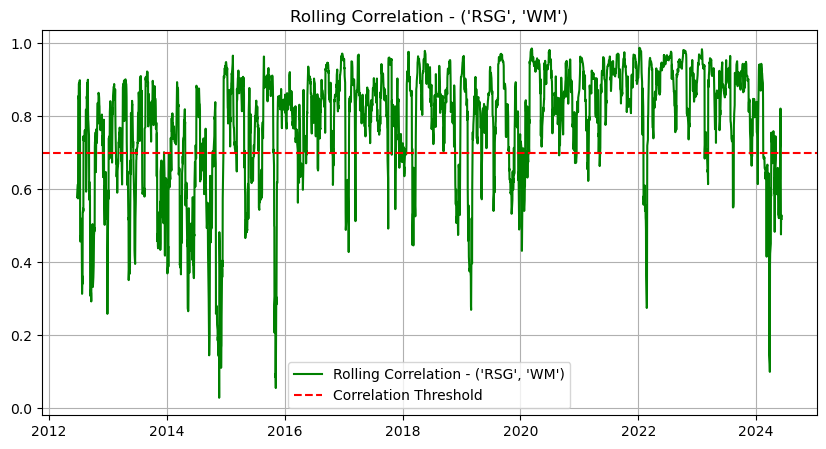

Performance for pair ('RSG', 'WM'):
Cumulative Return: 7.23%
Sharpe Ratio: 0.52
Sortino Ratio: 0.06
Max Drawdown: -23.06%
Calmar Ratio: 0.31
Test R²: -0.04
Number of Trades: 324


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


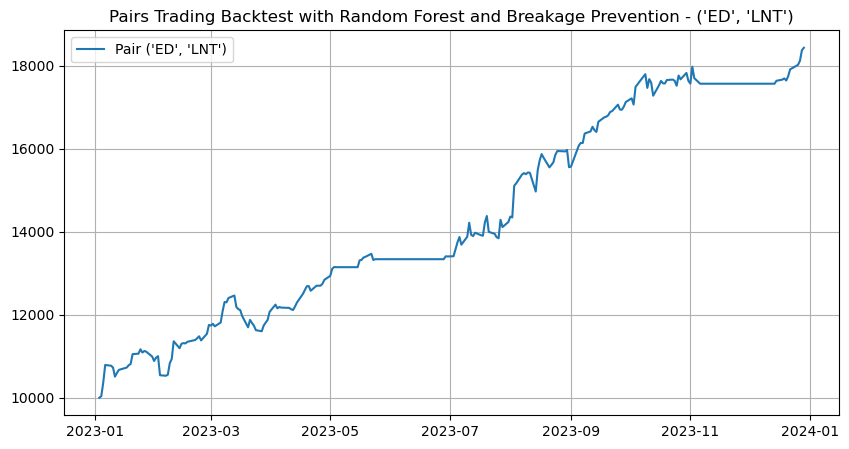

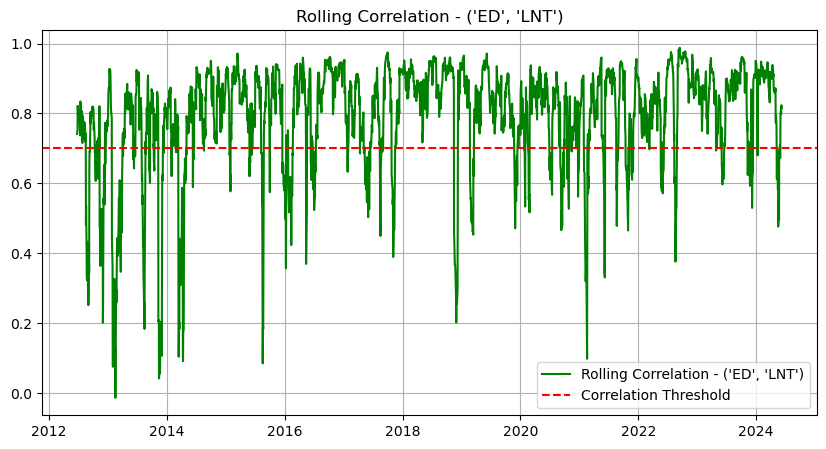

Performance for pair ('ED', 'LNT'):
Cumulative Return: 85.19%
Sharpe Ratio: 3.65
Sortino Ratio: 0.42
Max Drawdown: -6.91%
Calmar Ratio: 12.34
Test R²: -0.05
Number of Trades: 350


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


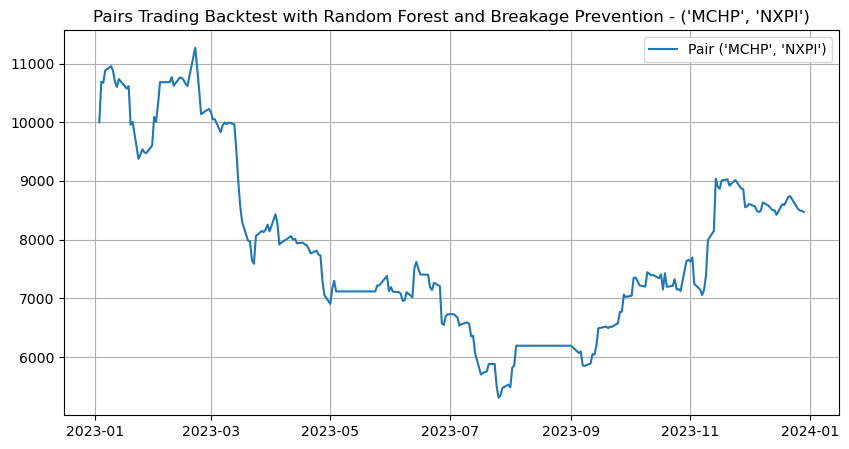

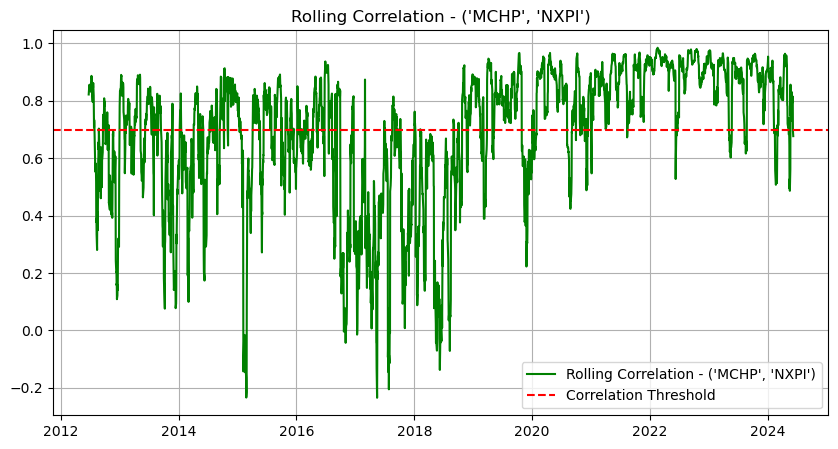

Performance for pair ('MCHP', 'NXPI'):
Cumulative Return: -15.42%
Sharpe Ratio: -0.25
Sortino Ratio: -0.02
Max Drawdown: -52.93%
Calmar Ratio: -0.29
Test R²: -0.08
Number of Trades: 348


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


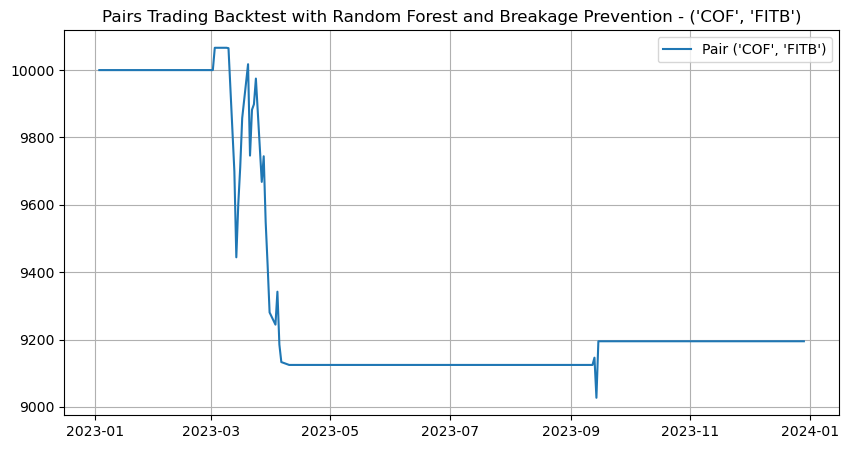

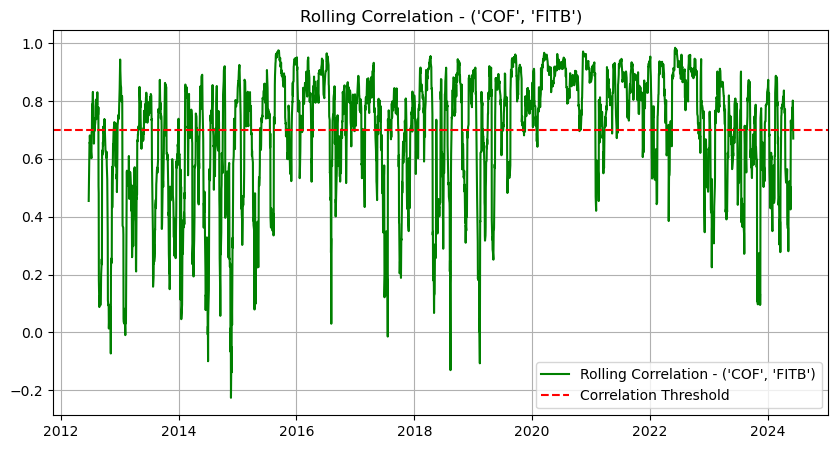

Performance for pair ('COF', 'FITB'):
Cumulative Return: -8.11%
Sharpe Ratio: -0.99
Sortino Ratio: -0.07
Max Drawdown: -10.32%
Calmar Ratio: -0.79
Test R²: -0.03
Number of Trades: 339


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


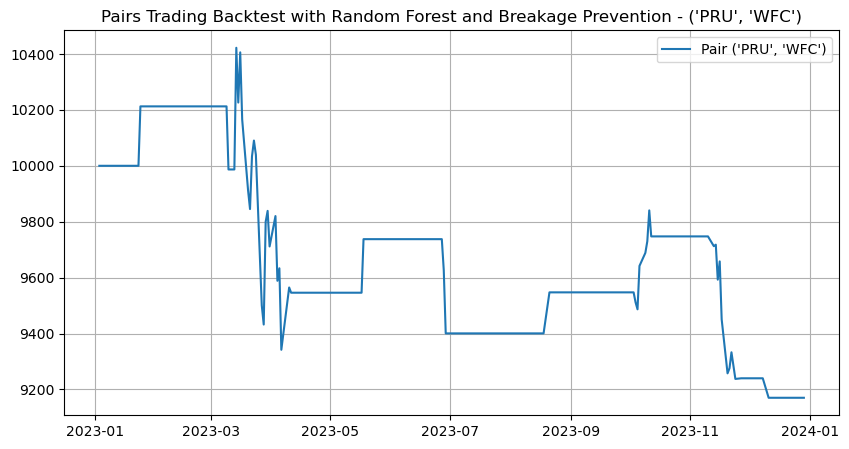

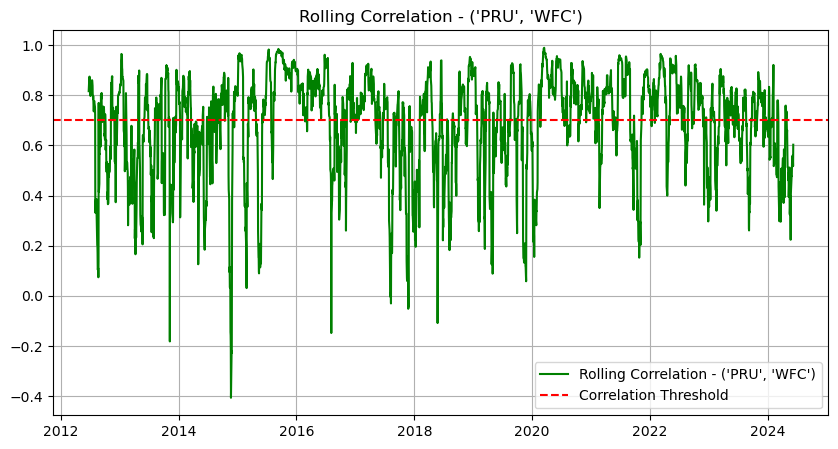

Performance for pair ('PRU', 'WFC'):
Cumulative Return: -8.36%
Sharpe Ratio: -0.64
Sortino Ratio: -0.05
Max Drawdown: -12.01%
Calmar Ratio: -0.70
Test R²: -0.07
Number of Trades: 346


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


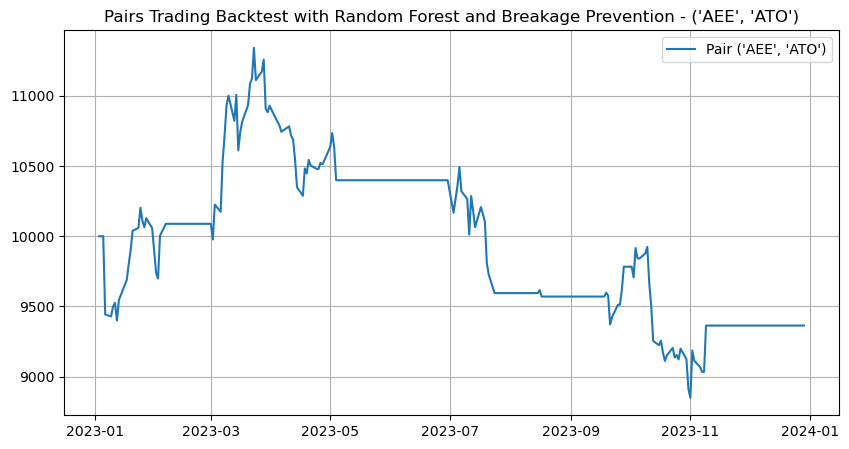

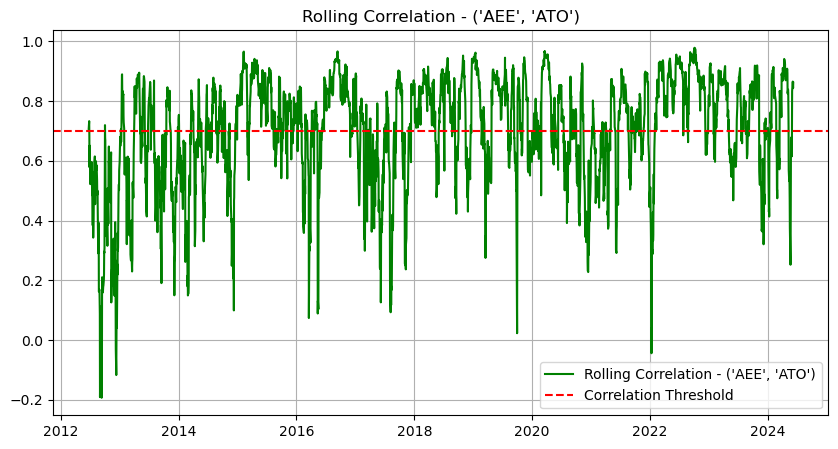

Performance for pair ('AEE', 'ATO'):
Cumulative Return: -6.41%
Sharpe Ratio: -0.32
Sortino Ratio: -0.03
Max Drawdown: -21.97%
Calmar Ratio: -0.29
Test R²: -0.08
Number of Trades: 354


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


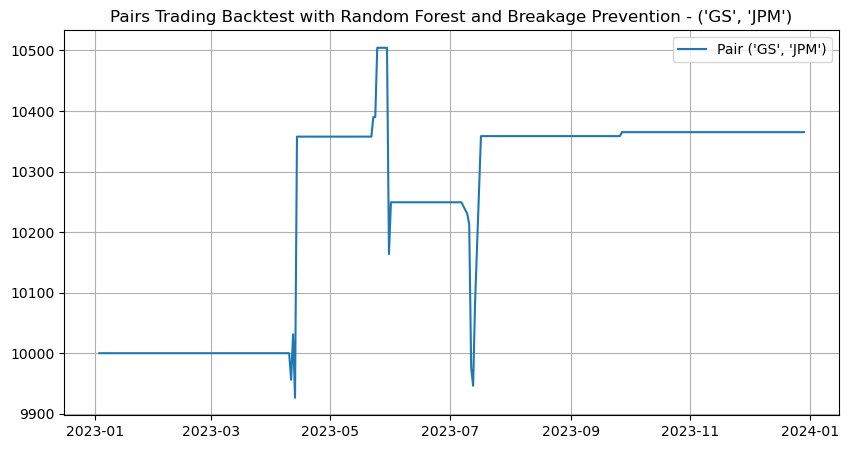

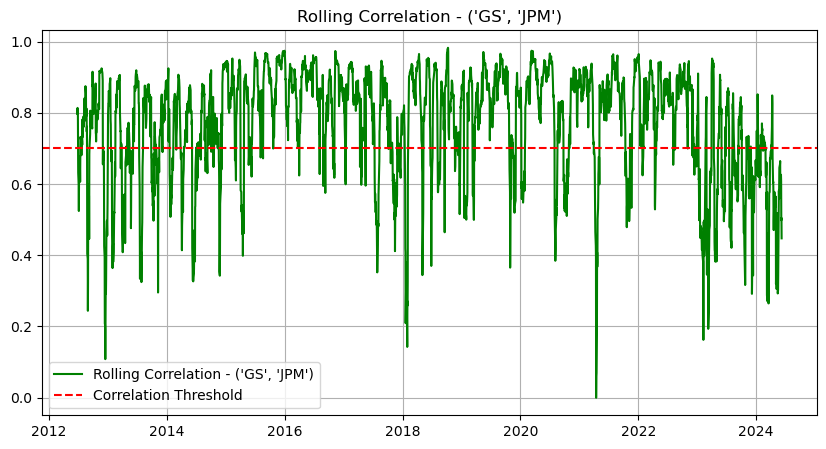

Performance for pair ('GS', 'JPM'):
Cumulative Return: 3.68%
Sharpe Ratio: 0.55
Sortino Ratio: 0.06
Max Drawdown: -5.32%
Calmar Ratio: 0.69
Test R²: -0.08
Number of Trades: 343


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


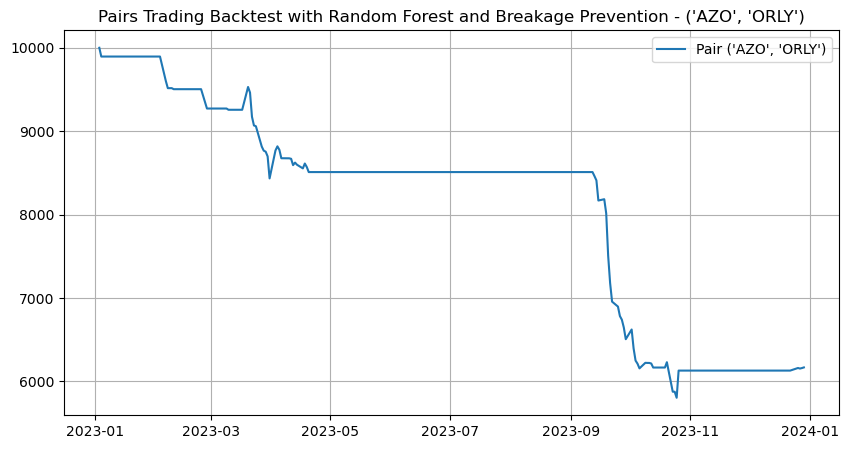

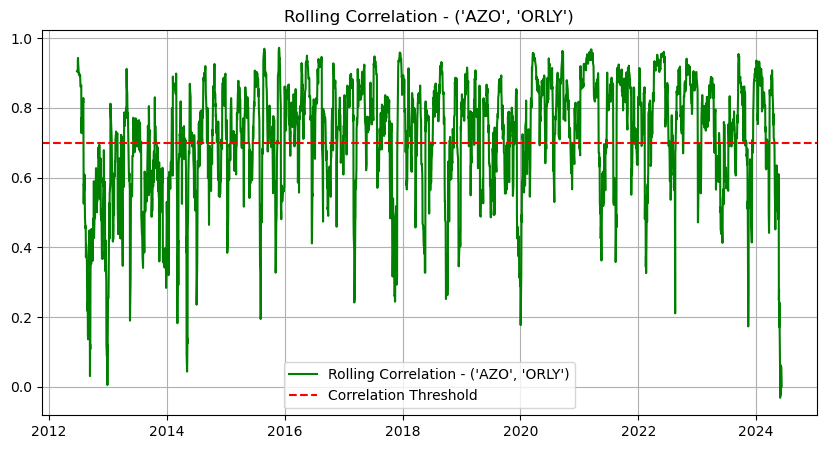

Performance for pair ('AZO', 'ORLY'):
Cumulative Return: -38.55%
Sharpe Ratio: -2.97
Sortino Ratio: -0.21
Max Drawdown: -41.34%
Calmar Ratio: -0.93
Test R²: -0.07
Number of Trades: 336


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


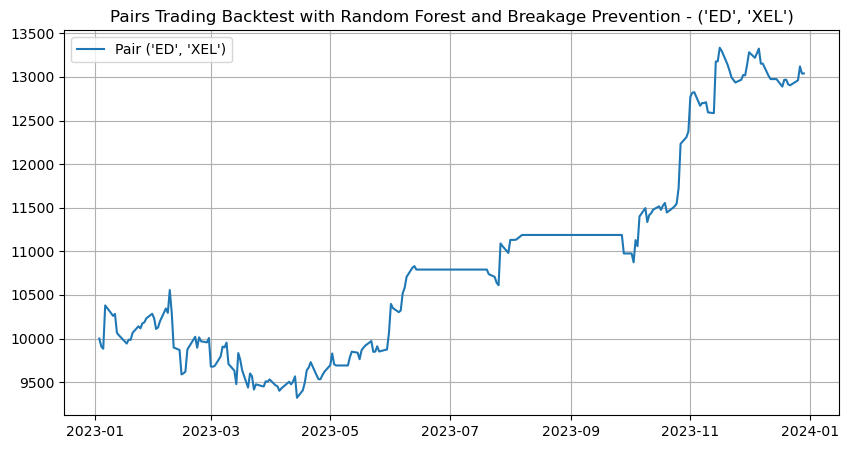

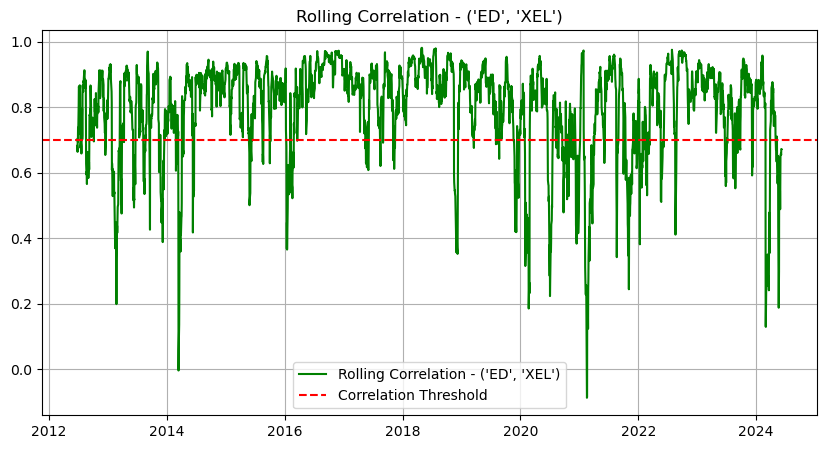

Performance for pair ('ED', 'XEL'):
Cumulative Return: 30.67%
Sharpe Ratio: 1.62
Sortino Ratio: 0.18
Max Drawdown: -11.70%
Calmar Ratio: 2.62
Test R²: -0.02
Number of Trades: 359


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


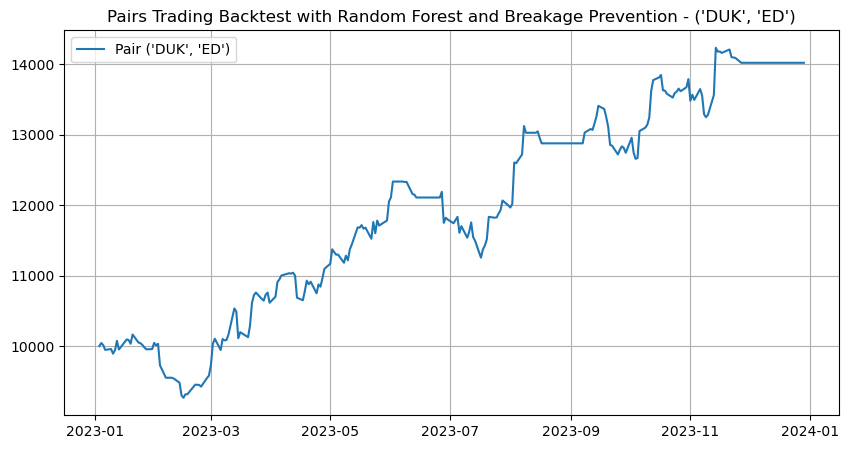

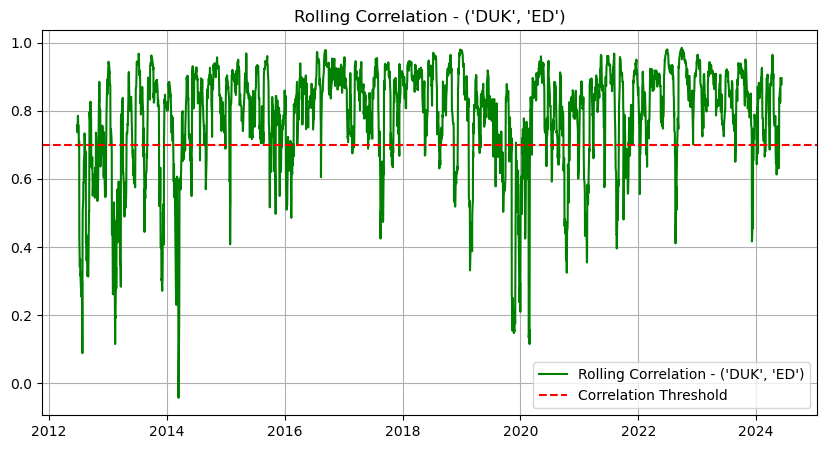

Performance for pair ('DUK', 'ED'):
Cumulative Return: 40.62%
Sharpe Ratio: 2.00
Sortino Ratio: 0.21
Max Drawdown: -8.84%
Calmar Ratio: 4.59
Test R²: -0.08
Number of Trades: 361


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


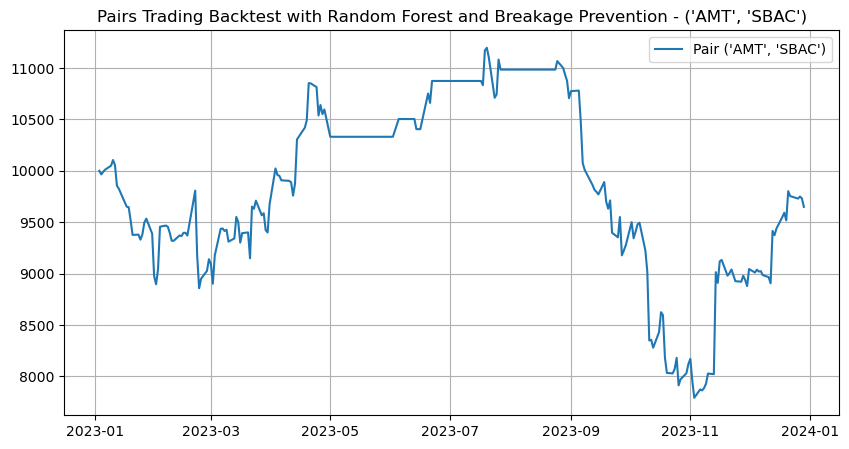

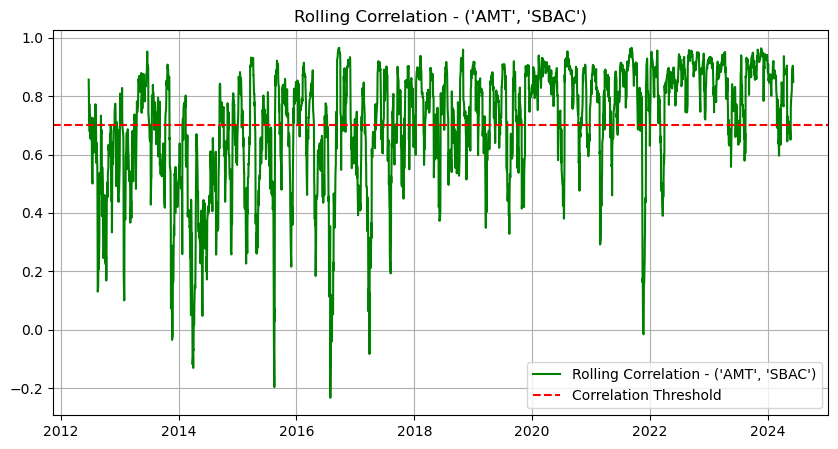

Performance for pair ('AMT', 'SBAC'):
Cumulative Return: -3.53%
Sharpe Ratio: 0.01
Sortino Ratio: 0.00
Max Drawdown: -30.41%
Calmar Ratio: -0.12
Test R²: -0.06
Number of Trades: 363


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


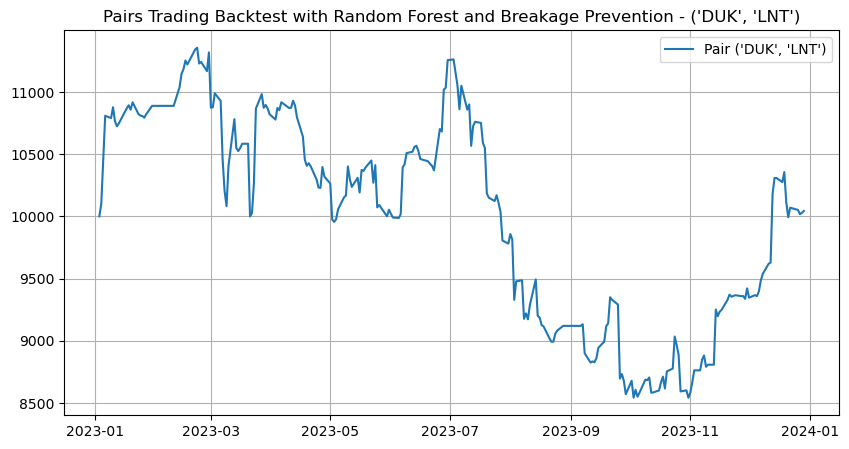

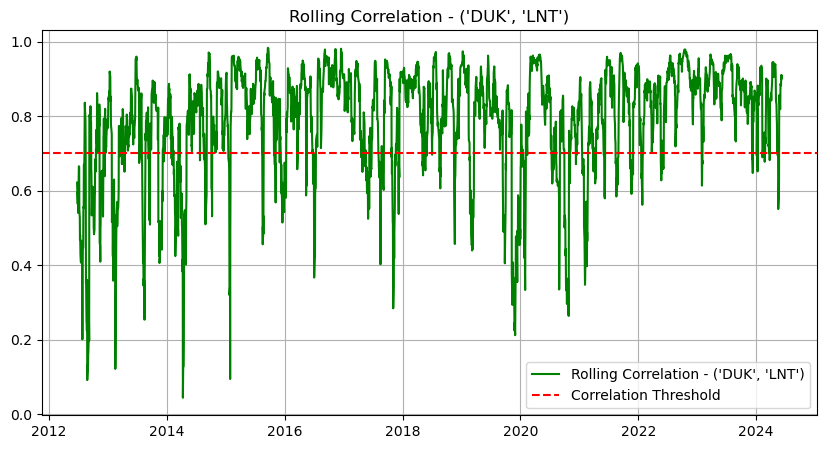

Performance for pair ('DUK', 'LNT'):
Cumulative Return: 0.44%
Sharpe Ratio: 0.14
Sortino Ratio: 0.01
Max Drawdown: -24.77%
Calmar Ratio: 0.02
Test R²: -0.05
Number of Trades: 353


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


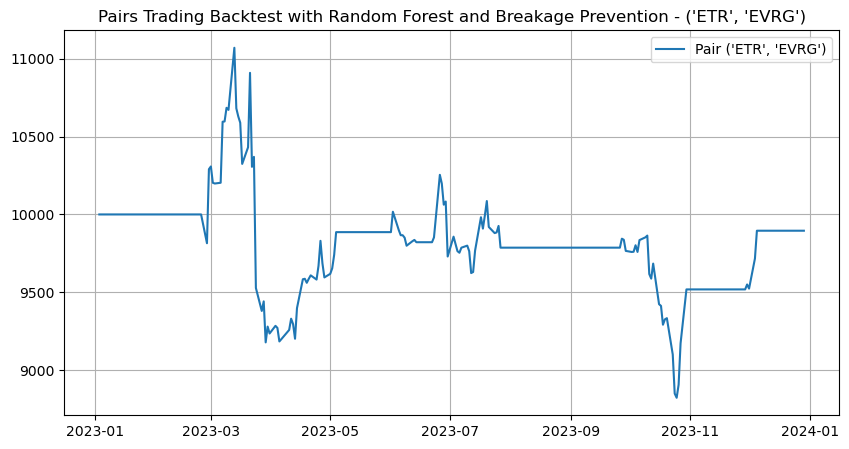

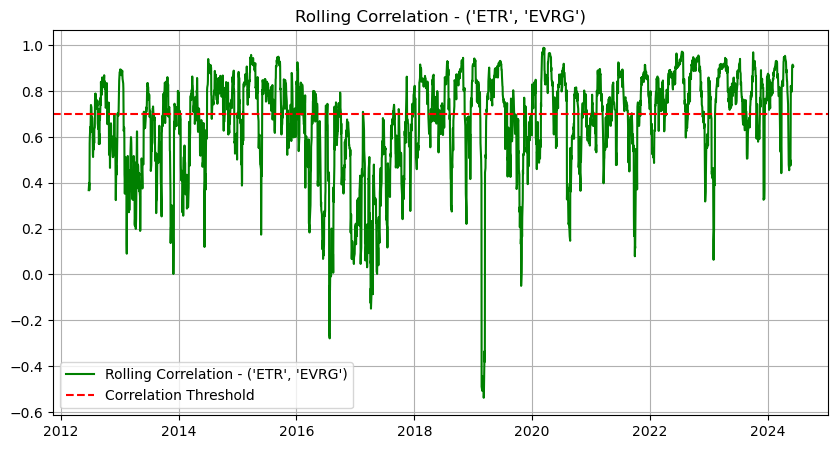

Performance for pair ('ETR', 'EVRG'):
Cumulative Return: -1.05%
Sharpe Ratio: 0.04
Sortino Ratio: 0.00
Max Drawdown: -20.29%
Calmar Ratio: -0.05
Test R²: -0.03
Number of Trades: 351


/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_48787/1055132720.py:13: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window


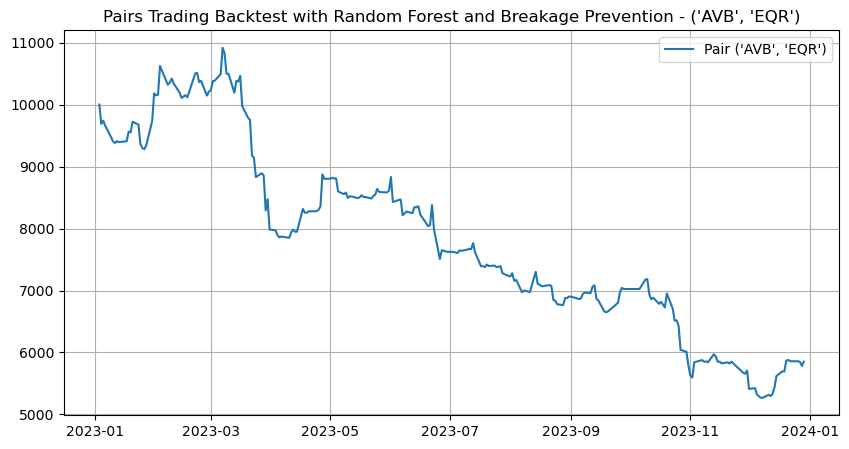

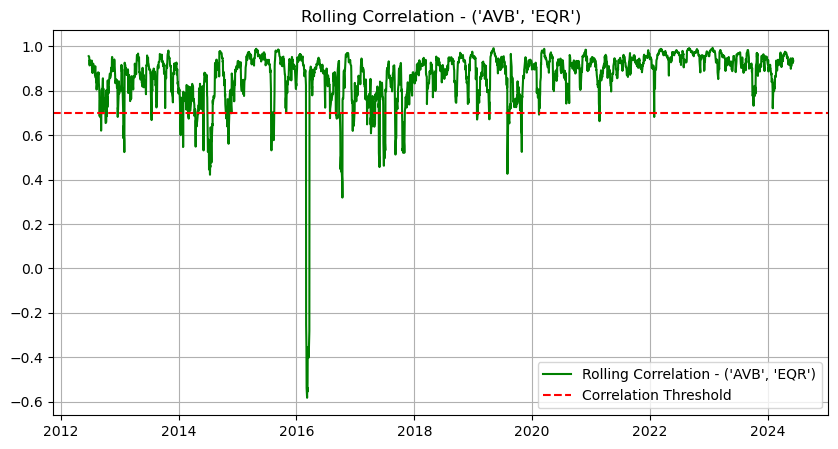

Performance for pair ('AVB', 'EQR'):
Cumulative Return: -41.72%
Sharpe Ratio: -1.73
Sortino Ratio: -0.14
Max Drawdown: -51.73%
Calmar Ratio: -0.81
Test R²: -0.09
Number of Trades: 347


In [24]:
def generate_features(stock1, stock2, window=30):
    spread = stock1 - stock2
    features = pd.DataFrame(index=spread.index)
    features['spread'] = spread
    features['zscore'] = (spread - spread.rolling(window).mean()) / spread.rolling(window).std()
    features['spread_change'] = spread.diff()
    features = features.dropna()
    return features

def calculate_hedge_ratios(stock1, stock2, window=30):
    returns1 = stock1.pct_change().dropna()
    returns2 = stock2.pct_change().dropna()
    hedge_ratios = pd.Series(index=returns1.index[window:])  # Adjust index to start after the first window

    # Use a rolling window to calculate the hedge ratio
    for i in range(window, len(returns1)):
        y = returns1.iloc[i-window:i]
        X = returns2.iloc[i-window:i]
        X = sm.add_constant(X)  # Adds a constant term to the predictor
        model = sm.OLS(y, X).fit()
        if i-1 < len(hedge_ratios):
            hedge_ratios.iloc[i-window] = model.params[1]  # Correctly assign using iloc

    return hedge_ratios

# Function to train Random Forest model
def train_rf_model(features, train_start, train_end):
    scaler = StandardScaler()
    X = scaler.fit_transform(features[['spread', 'zscore', 'spread_change']])
    y = np.sign(features['spread_change'].shift(-1)).dropna()
    X = X[:-1]  # Ensure X and y have the same length

    train_mask = (features.index[:-1] >= train_start) & (features.index[:-1] <= train_end)
    X_train, y_train = X[train_mask], y[train_mask]

    model = RandomForestRegressor(n_estimators=150, max_depth=15, min_samples_split=10, random_state=64)
    model.fit(X_train, y_train)
    
    return model, scaler

def evaluate_model(model, scaler, features, test_start, test_end):
    X = scaler.transform(features[['spread', 'zscore', 'spread_change']])
    y = np.sign(features['spread_change'].shift(-1)).dropna()
    X = X[:-1]  # Ensure X and y have the same length

    test_mask = (features.index[:-1] >= test_start) & (features.index[:-1] <= test_end)
    X_test, y_test = X[test_mask], y[test_mask]

    y_test_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    
    return r2

# Function to generate trading signals using the trained Random Forest model
def generate_signals(model, scaler, features):
    X = scaler.transform(features[['spread', 'zscore', 'spread_change']])
    predictions = model.predict(X)
    signals = pd.DataFrame(index=features.index)
    signals['signal'] = predictions
    signals['long'] = (signals['signal'] > 0).astype(int)
    signals['short'] = (signals['signal'] < 0).astype(int)
    return signals

# Function to backtest pairs with breakage prevention and trading costs
def backtest_pairs_with_breakage(stock1, stock2, signals, test_start, test_end, correlation_threshold=0.8, window=20, initial_capital=10000, trading_cost_bips=5):

    hedge_ratios = calculate_hedge_ratios(stock1, stock2, window)
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    positions[stock1.name] = (signals['long'] - signals['short'])  # Number of shares of stock1
    positions[stock2.name] = -(positions[stock1.name] * hedge_ratios.reindex(positions.index, fill_value=0)).shift()

  

    stock1_returns = stock1.pct_change().fillna(0)
    stock2_returns = stock2.pct_change().fillna(0)

    portfolio = pd.DataFrame(index=positions.index)
    portfolio['stock1'] = positions[stock1.name] * stock1_returns
    portfolio['stock2'] = positions[stock2.name] * stock2_returns
    portfolio['total'] = portfolio['stock1'] + portfolio['stock2']
    
    # Calculate trading costs (5 bips = 0.05%)
    trading_cost = trading_cost_bips / 10000
    position_changes = positions.diff().abs()
    trading_costs = position_changes.sum(axis=1) * trading_cost
    
    portfolio['returns'] = portfolio['total'] - trading_costs

    rolling_corr = stock1_returns.rolling(window=window).corr(stock2_returns)

    portfolio['exit'] = (rolling_corr < correlation_threshold).astype(int).shift(1).fillna(0)
    portfolio.loc[portfolio['exit'] == 1, 'returns'] = 0

    test_mask = (portfolio.index >= test_start) & (portfolio.index <= test_end)
    test_portfolio = portfolio[test_mask].copy()

    # Reset cumulative returns for the test period
    test_portfolio['cumulative'] = (test_portfolio['returns'] + 1).cumprod()
    test_portfolio['cumulative'] = test_portfolio['cumulative'] * initial_capital
    test_portfolio.iloc[0, test_portfolio.columns.get_loc('cumulative')] = initial_capital

    # Count trades
    number_of_trades = count_trades(positions, test_start, test_end)

    return test_portfolio, number_of_trades


# Performance metrics calculation functions
def annual_returns(returns):
    num_years = len(returns) / 252
    cum_ret_final = np.prod(returns + 1)
    return cum_ret_final ** (1 / num_years) - 1

def Sharpe(returns, risk_free=0):
    adj_returns = returns - risk_free
    return (np.nanmean(adj_returns) * np.sqrt(252)) / np.nanstd(adj_returns, ddof=1)

def downside_risk(returns, risk_free=0):
    adj_returns = returns - risk_free
    sqr_downside = np.square(np.clip(adj_returns, None, 0))
    return np.sqrt(np.nanmean(sqr_downside) * 252)

def sortino(returns, risk_free=0):
    adj_returns = returns - risk_free
    drisk = downside_risk(adj_returns)
    if drisk == 0:
        return np.nan
    return (np.nanmean(adj_returns) * np.sqrt(252)) / drisk

def max_drawdown(returns):
    wealth_index = 1000 * (1 + returns).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks) / previous_peaks
    return drawdown.min()

# Simplified function to calculate performance metrics
def calculate_performance_metrics(cumulative_pnl, returns):
    cumulative_return = annual_returns(returns) * 100
    sharpe_ratio = Sharpe(returns)
    sortino_ratio = sortino(returns)
    max_drawdown_value = max_drawdown(returns) * 100
    calmar_ratio = (annual_returns(returns) / -max_drawdown(returns)) if max_drawdown(returns) != 0 else np.nan  # Ensure non-zero denominator

    return {
        'Cumulative Return (%)': cumulative_return,
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio,
        'Max Drawdown (%)': max_drawdown_value,
        'Calmar Ratio': calmar_ratio}

def calculate_drawdown(returns):
    wealth_index = 1000 * (1 + returns).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks) / previous_peaks
    return drawdown

def count_trades(positions, start_date, end_date):
    # Filter positions for the trading period
    filtered_positions = positions.loc[start_date:end_date]
    trades = filtered_positions.diff().fillna(0)  # First get the day-to-day changes
    trade_counts = (trades != 0).sum().sum()  # Sum over all changes; count non-zero changes
    return trade_counts


# Define training and testing periods
train_start = '2018-01-01'
train_end = '2022-12-31'
test_start = '2023-01-01'
test_end = '2023-12-31'

# Loop through each pair and backtest using Random Forest with pair breakage prevention
results = {}
performance_metrics = {}
all_cumulative_pnl = pd.DataFrame()

for pair, data in all_stock_data.items():
    stock1, stock2 = data[pair[0]], data[pair[1]]
    features = generate_features(stock1, stock2)
    if features.empty:
        continue
    model, scaler = train_rf_model(features, train_start, train_end)
    signals = generate_signals(model, scaler, features)
    if signals.empty:
        continue
    portfolio, number_of_trades = backtest_pairs_with_breakage(stock1, stock2, signals, test_start, test_end)

    results[pair] = portfolio
    cumulative_pnl = portfolio['cumulative']
    pnl = portfolio['returns']
    test_r2 = evaluate_model(model, scaler, features, test_start, test_end)
    performance_metrics[pair] = calculate_performance_metrics(cumulative_pnl, pnl)
    # all_cumulative_pnl = all_cumulative_pnl.join(cumulative_pnl, how='outer', rsuffix=f'_{pair}')
    performance_metrics[pair]['Number of Trades'] = number_of_trades
    
    # plt.title(f"Trading Signals on Spread for Pair {pair}")
    # plt.xlabel("Date")
    # plt.ylabel("Spread")
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # Plot the cumulative PnL
    plt.figure(figsize=(10, 5))
    plt.plot(portfolio['cumulative'], label=f"Pair {pair}")
    plt.title(f"Pairs Trading Backtest with Random Forest and Breakage Prevention - {pair}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the Rolling Correlation
    rolling_corr = stock1.pct_change().rolling(window=15).corr(stock2.pct_change())
    plt.figure(figsize=(10, 5))
    plt.plot(rolling_corr, label=f"Rolling Correlation - {pair}",color='green',)
    plt.axhline(y=0.7, color='r', linestyle='--', label="Correlation Threshold")
    plt.title(f"Rolling Correlation - {pair}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print performance metrics
    metrics = performance_metrics[pair]
    print(f"Performance for pair {pair}:")
    print(f"Cumulative Return: {metrics['Cumulative Return (%)']:.2f}%")
    print(f"Sharpe Ratio: {metrics['Sharpe Ratio']:.2f}")
    print(f"Sortino Ratio: {metrics['Sortino Ratio']:.2f}")
    print(f"Max Drawdown: {metrics['Max Drawdown (%)']:.2f}%")
    print(f"Calmar Ratio: {metrics['Calmar Ratio']:.2f}")
    print(f"Test R²: {test_r2:.2f}")
    print(f"Number of Trades: {number_of_trades}")


In [25]:
# Calculate overall performance
overall_cumulative_pnl = all_cumulative_pnl.sum(axis=1)
overall_returns = overall_cumulative_pnl.pct_change().dropna()
overall_cumulative_return, overall_sharpe_ratio, overall_sortino_ratio, overall_max_drawdown_value = calculate_performance_metrics(overall_cumulative_pnl, overall_returns)


# Plot overall cumulative PnL
plt.figure(figsize=(10, 5))
plt.plot(overall_cumulative_pnl, label="Overall Cumulative PnL")
plt.title("Overall Pairs Trading Backtest with Random Forest and Breakage Prevention")
plt.legend()
plt.grid(True)
plt.show()

# Print overall performance metrics
print("Overall Performance:")
print(f"Cumulative Return: {overall_cumulative_return:.2f}%")
print(f"Sharpe Ratio: {overall_sharpe_ratio:.2f}")
print(f"Sortino Ratio: {overall_sortino_ratio:.2f}")
print(f"Max Drawdown: {overall_max_drawdown_value:.2f}%")

ZeroDivisionError: float division by zero

## HYPERPARAMETER TUNING

In [ ]:
# def grid_search_backtest_all_pairs(pair_df, start_date, end_date, train_start, train_end, test_start, test_end, initial_capital=10000):
#     # Define the ranges for hyperparameters
#     correlation_thresholds = [0.7, 0.8, 0.9]
#     windows = [5, 10, 15, 20]

#     best_performance = None
#     best_params = None
#     all_results = []

#     for correlation_threshold in correlation_thresholds:
#         for window in windows:
#             overall_cumulative_pnl = pd.Series(dtype='float64')
            
#             for index, row in pair_df.iterrows():
#                 pair = [row['Pair 1'], row['Pair 2']]
#                 data = get_stock_data(pair, start_date, end_date)
                
#                 stock1, stock2 = data[pair[0]], data[pair[1]]
#                 features = generate_features(stock1, stock2)
#                 if features.empty:
#                     continue
#                 model, scaler = train_rf_model(features, train_start, train_end)
#                 signals = generate_signals(model, scaler, features)
#                 if signals.empty:
#                     continue
#                 test_portfolio = backtest_pairs_with_breakage(
#                     stock1, stock2, signals, test_start, test_end, 
#                     correlation_threshold=correlation_threshold, window=window, initial_capital=initial_capital
#                 )
#                 if overall_cumulative_pnl.empty:
#                     overall_cumulative_pnl = test_portfolio['cumulative']
#                 else:
#                     overall_cumulative_pnl = overall_cumulative_pnl.add(test_portfolio['cumulative'], fill_value=0)

#             cumulative_return = overall_cumulative_pnl.iloc[-1] - initial_capital
#             sharpe_ratio = Sharpe(overall_cumulative_pnl.pct_change().dropna())
#             sortino_ratio = sortino(overall_cumulative_pnl.pct_change().dropna())
#             max_drawdown_value = max_drawdown(overall_cumulative_pnl.pct_change().dropna()) * 100

#             performance = {
#                 'correlation_threshold': correlation_threshold,
#                 'window': window,
#                 'cumulative_return': cumulative_return,
#                 'sharpe_ratio': sharpe_ratio,
#                 'sortino_ratio': sortino_ratio,
#                 'max_drawdown': max_drawdown_value
#             }
#             all_results.append(performance)

#             # Print the overall cumulative PnL for the current hyperparameters
#             print(f"Overall cumulative PnL for correlation_threshold={correlation_threshold} and window={window}:")
#             print(overall_cumulative_pnl)

#             # Update best performance if current performance is better
#             if best_performance is None or performance['cumulative_return'] > best_performance['cumulative_return']:
#                 best_performance = performance
#                 best_params = (correlation_threshold, window)

#     return best_performance, best_params, pd.DataFrame(all_results)

# # Run grid search
# best_performance, best_params, results_df = grid_search_backtest_all_pairs(pair_df, start_date, end_date, train_start, train_end, test_start, test_end)

# # Print best performance
# print("Best performance:")
# print(f"Correlation Threshold: {best_params[0]}")
# print(f"Window: {best_params[1]}")
# print(f"Cumulative Return: {best_performance['cumulative_return']:.2f}")
# print(f"Sharpe Ratio: {best_performance['sharpe_ratio']:.2f}")
# print(f"Sortino Ratio: {best_performance['sortino_ratio']:.2f}")
# print(f"Max Drawdown: {best_performance['max_drawdown']:.2f}%")

# # Print the overall cumulative PnL for the best hyperparameters
# print("Overall cumulative PnL for the best hyperparameters:")
# print(best_performance)

# # Display all results
# print(results_df)
